# 3.6---基本图表绘制：plt.plot()

## 图表类别：线形图，柱状图，密度图，以横纵坐标两个维度为主
## 同时可以延展出多种其他图表形式

### plt.plot(kind = 'line', ax = None, figsize = None, use_index = True, title = True, grid = None, legend = False,
###             style = None, logx = False, logy = False, loglog = False, xticks = None, yticks = None, xlim = None,
###             ylim = None, rot = None, fontsize = None, colormap = None, table = False, yerr = None, label = None,
###             secondary_y = False, **kwds)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

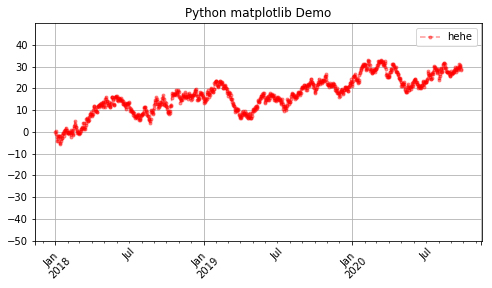

In [2]:
# Series直接生成图表

ts = pd.Series(np.random.randn(1000),index = pd.date_range('2018-1-1',periods = 1000))
ts = ts.cumsum()
ts.plot(kind = 'line',
       label = 'hehe',
       style = '--g.',
       color = 'red',
       alpha = 0.4,
       use_index = True,
       rot = 45,
       grid = True,
       ylim = [-50,50],
       yticks = list(range(-50,50,10)),
       figsize = (8,4),
       title = 'Python matplotlib Demo',
       legend = True)

# plt.grid(True, linestyle = '--',color = 'gray',linewidth = '0.5',axis = 'both')       # 网格

plt.legend()

# Series.plot(): series的index为横坐标，value为纵坐标
# kind：line,bar,barh...(折线图，柱状图，柱状图-横。。。)
# label：图例标签，Dataframe格式以列名为label
# style：风格字符串，这里包括了linestyle('--'), marker('.'), color('g')
# color：颜色，有color指定的时候，以color指定为准
# alpha：透明度，0-1
# use_index：将索引用为刻度标签，默认为True
# rot：旋转刻度标签，0-360
# grid：显示网格，一般会直接用plt.grid()
# xlim,ylim：x轴，y轴界限
# xticks,yticks：x轴，y轴刻度值
# figsize：图像大小
# title：图的名称
# legend：是否显示图例，一般直接用plt.legend()
# 也可以直接用plt.plot(ts)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000248F1A3BF28>,
      dtype=object)

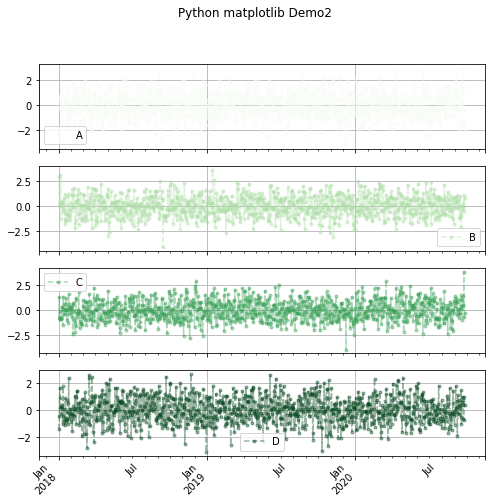

In [3]:
# DataFrame直接生成图表

df = pd.DataFrame(np.random.randn(1000,4),index = pd.date_range('2018-1-1',periods = 1000),columns = list('ABCD'))
ts = ts.cumsum()
df.plot(kind = 'line',
       style = '--.',
       alpha = 0.4,
       use_index = True,
       rot = 45,
       grid = True,
       figsize = (8,8),
       title = 'Python matplotlib Demo2',
       legend = True,
       subplots = True,
       colormap = 'Greens')

# subplots ---> 是否将各个列绘制到不同的图表，默认为False
# 也可以写成：plt.plot(df)

# 3.7---柱状图，堆叠图
## plt.plot(kind = 'bar/barh')    plt.bar()

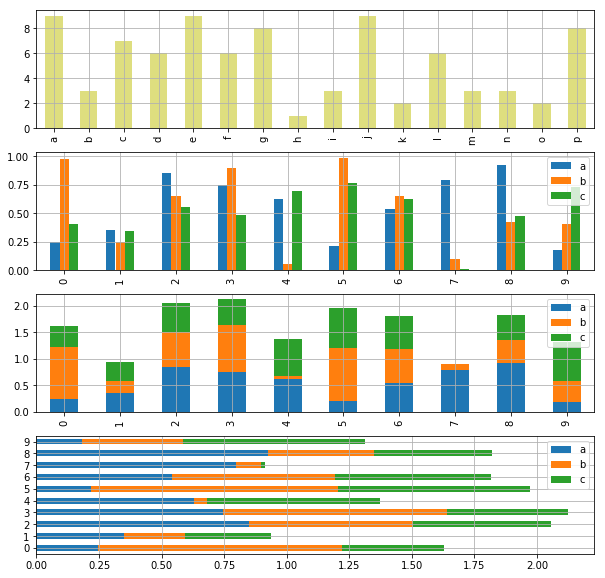

In [4]:
# 柱状图与堆叠图

fig,axes = plt.subplots(4,1,figsize = (10,10))
s = pd.Series(np.random.randint(0,10,16),index = list('abcdefghijklmnop'))
df = pd.DataFrame(np.random.rand(10,3),columns = list('abc'))

s.plot(kind = 'bar',color = 'y',grid = True,alpha = 0.5,ax = axes[0])       # ax参数：选择第几个子图
# 单系列柱状图方法一：plt.plot(kind = 'bar/barh')

df = pd.DataFrame(np.random.rand(10,3),columns = list('abc'))
df.plot(kind = 'bar',ax = axes[1],grid = True)
# 多系列柱状图

df.plot(kind = 'bar',ax = axes[2],grid = True,stacked = True)
# 多系列堆叠图
#stacked ---> 堆叠

df.plot.barh(ax = axes[3],grid = True,stacked = True)
# 新版本 plt.plot.<kind>

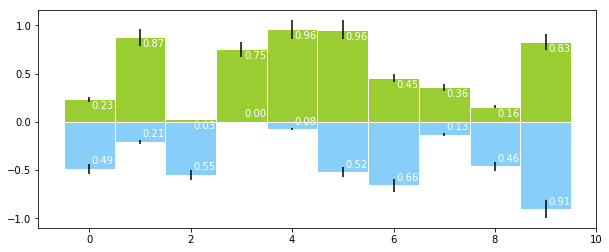

In [5]:
# 柱状图：plt.bar()

plt.figure(figsize = (10,4))
x = np.arange(10)
y1 = np.random.rand(10)
y2 = -np.random.rand(10)

plt.bar(x,y1,width = 1,facecolor = 'yellowgreen',edgecolor = 'white',yerr = y1*0.1)
plt.bar(x,y2,width = 1,facecolor = 'lightskyblue',edgecolor = 'white',yerr = y2*0.1)

# x,y参数：x，y值
# width：宽度比例
# facecolor：柱状图里填充的颜色，edgecolor是边框的颜色
# left - 每个柱x轴左边界，bottom - 每个柱y轴下边界 ---> bottom扩展即可化为甘特图Gantt chart
# align：决定每个bar图的分布，默认left表示默认从左边界开始绘制，center会将图绘制在中间位置
# xerr/yerr：x/y方向error bar

for i,j in zip(x,y1):
    plt.text(i+0.05,j-0.1,'%.2f'% j,color = 'white')
for i,j in zip(x,y2):
    plt.text(i+0.05,j+0.05,'%.2f'% -j,color = 'white')
# 绘图添加text
# zip()函数用于将可以迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组所组成的列表

           Freeze    Wind   Flood   Quake    Hail
100 years   66386  174296   75131  577908   32015
50 years    58230  381139   78045   99308  160454
20 years    89135   80552  152558  497981  603535
10 years    78415   81858  150656  193263   69638
5 years    139361  331509  343164  781380   52269


([], <a list of 0 Text xticklabel objects>)

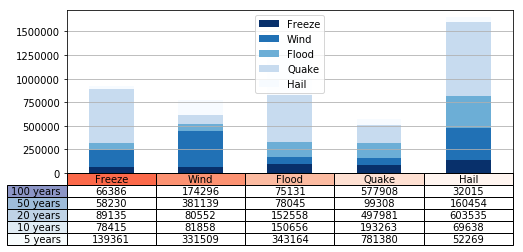

In [6]:
# 外嵌图表：plt.table()
# table(cellText = None,cellColours = None,cellLoc = 'right',colWidths = None,rowLabels = None,rowColours = None,rowLoc = 'left',
# colLabels = None,colColours = None,colLoc = 'center',loc = 'bottom',bbox = None)

data = [[66386,174296,75131,577908,32015],
       [58230,381139,78045,99308,160454],
       [89135,80552,152558,497981,603535],
       [78415,81858,150656,193263,69638],
       [139361,331509,343164,781380,52269]]
column = ['Freeze','Wind','Flood','Quake','Hail']
row = ['%d years'% x for x in (100,50,20,10,5)]
df = pd.DataFrame(data,index = row,columns = column)
print(df)

df.plot(kind = 'bar',grid = True,colormap = 'Blues_r',stacked = True,figsize = (8,3))
# 创建堆叠图

plt.table(cellText = data,
         cellLoc = 'center',
         cellColours = None,
         rowLabels = row,
         rowColours = plt.cm.BuPu(np.linspace(0,0.5,5))[::-1],                        # BuPu可以换成其他的colormap
         colLabels = column,
         colColours = plt.cm.Reds(np.linspace(0,0.5,5))[::-1],
         rowLoc = 'right',
         loc = 'bottom')
# cellText: 表格文本
# cellLoc: cell内文本对齐位置
# rowLabels: 行标签
# colLabels: 列标签
# rowLoc: 行标签对齐位置
# loc：表格位置 ---> left, right, top, bottom

plt.xticks([])
# 不显示X轴标注

# 3.8---面积图，填图，饼图

## plt.plot.area()
## plt.fill(), plt.fill_between()
## plt.pie()

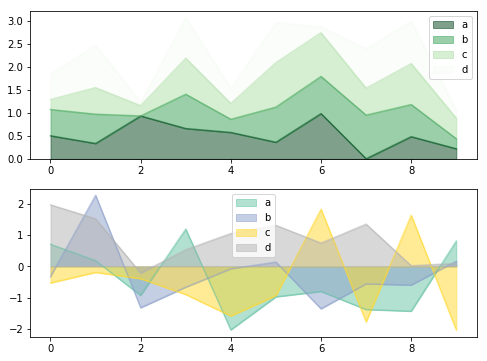

In [7]:
# 面积图

fig,axes = plt.subplots(2,1,figsize = (8,6))
df1 = pd.DataFrame(np.random.rand(10,4),columns = list('abcd'))
df2 = pd.DataFrame(np.random.randn(10,4),columns = list('abcd'))

df1.plot.area(colormap = 'Greens_r',alpha = 0.5,ax = axes[0])
df2.plot.area(stacked = False,colormap = 'Set2',alpha = 0.5,ax = axes[1])

# 使用Series.plot.area()和DataFrame.plot.area()创建面积图
# stacked：是否堆叠，默认情况下，区域图被堆叠
# 为了产生堆积面积图，每列必须是正值或者全部负值！
# 当数据有NaN时候，自动填充0，所以图标签需要清洗掉缺失值

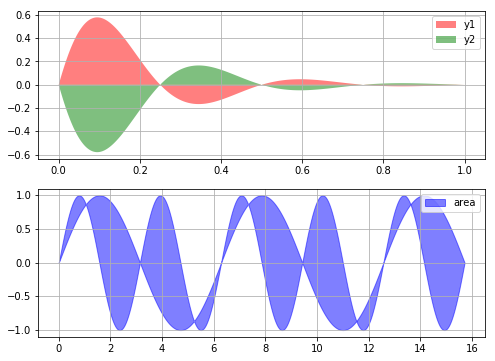

In [8]:
# 填图

fig,axes = plt.subplots(2,1,figsize = (8,6))

x = np.linspace(0,1,500)
y1 = np.sin(4 * np.pi * x) * np.exp(-5 * x)
y2 = -np.sin(4 * np.pi * x) * np.exp(-5 * x)
axes[0].fill(x,y1,'r',alpha = 0.5,label = 'y1')
axes[0].fill(x,y2,'g',alpha = 0.5,label = 'y2')
# 对函数与坐标轴之间的区域进行相应的填充，使用fill函数
# 也可以写成：plt.fill(x,y1,'r',x,y2,'g',alpha = 0.5)

x = np.linspace(0,5 * np.pi,1000)
y1 = np.sin(x)
y2 = np.sin(2 * x)
axes[1].fill_between(x,y1,y2,color = 'b',alpha = 0.5,label = 'area')
# 填充两个函数之间的区域，使用到fill_between函数

for i in range(2):
    axes[i].legend()
    axes[i].grid()
# 添加图例，格网

a    0.918820
b    2.078822
c    0.781886
d    2.143398
Name: series, dtype: float64


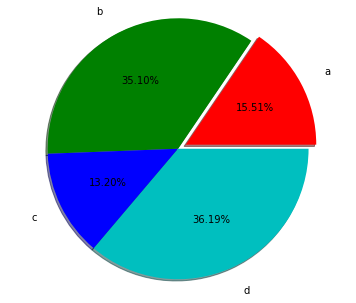

In [9]:
# 饼图：plt.pie()
# plt.pie(x, explode=None, labels=None, colors=None, autopct=None,pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None,
# radius=None, counterclock=True, wedgeprops=None, textprops=None,center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)

s = pd.Series(3 * np.random.rand(4),index = list('abcd'),name = 'series')
plt.axis('equal')      # 保证长和宽相等
plt.pie(s, 
        explode=[0.1,0,0,0], 
        labels=s.index, 
        colors=['r','g','b','c'],
        autopct='%.2f%%',
        pctdistance=0.6, 
        labeldistance=1.2,
        shadow=True,
        startangle=0,
        radius=1.5,
        frame=False)
print(s)

# 第一个参数：数据
# explode：指定每部分的偏移量
# labels：标签
# colors：颜色
# autopct：饼图上的数据标签显示方式
# pcdistance：每个饼切片的中心和通过autopct生成的文本开始之间的比例
# labeldistance：被画饼标记的直径，默认值为1.1
# shadow：阴影
# stratangle：开始角度
# radius：半径
# frame：图框
# counterclock：指定时针方向，顺时针或者逆时针，默认为逆时针！！！注意

# 直方图
## plt.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False,
## bottom=None, histtype='bar', align='mid', orientation='vertical',rwidth=None, log=False,
## color=None, label=None, stacked=False,normed=None, hold=None, data=None, **kwargs)

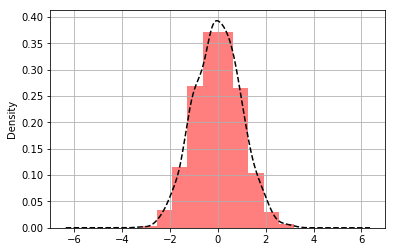

In [10]:
# 直方图+密度图

s = pd.Series(np.random.randn(1000))
s.hist(bins=10, 
       histtype='bar',
       align='mid', 
       orientation='vertical',
       alpha=0.5,
       color = 'r',
       density=True)

# bins：箱子的宽度,也就是直方图的个数！！！
# normed：标准化
# histtype：风格---bar，barstacked，step，stepfilled
# orientation：水平还是垂直{‘horizontal’，‘vertical’}
# align：{‘left’，‘mid’，‘right’}，optional（对齐方式）

s.plot(kind = 'kde',style = 'k--',grid = True)
# 密度图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248F3ED7470>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

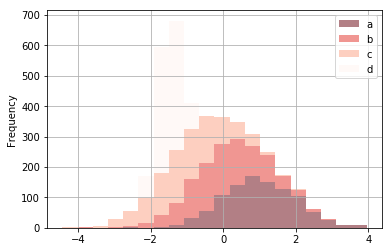

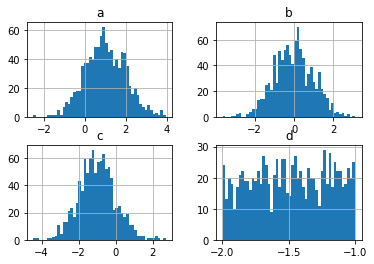

In [11]:
# 堆叠直方图

plt.figure(num = 1)
df = pd.DataFrame({
    'a':np.random.randn(1000)+1,
    'b':np.random.randn(1000),
    'c':np.random.randn(1000)-1,
    'd':np.random.rand(1000)-2},
    columns = list('abcd')
)
df.plot.hist(stacked = True,
            bins = 20,
            colormap = 'Reds_r',
            alpha = 0.5,
            grid = True
            )
# 使用DataFrame.plot.hist()和Series.plot.hist()方法来进行绘制
# stacked：是否堆叠

df.hist(bins = 50)

# 3.10---散点图，矩阵散点图
## plt.scatter(), pd.scatter_matrix()

d:\python\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


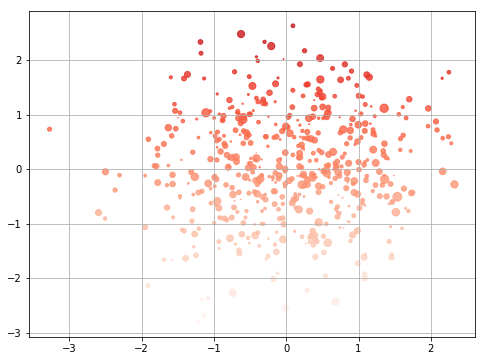

In [12]:
# plt.scatter()散点图
# plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, 
# alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)

plt.figure(figsize=(8,6))
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x,y,marker = '.',
           s = np.random.randn(1000)*100,
           cmap = 'Reds',
           c = y,
           alpha = 0.8
           )
plt.grid()
# s: 散点的大小
# c: 散点的颜色
# vmin，vmax：亮度设置，标量
# cmap：colormap

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248F4253F60>,
      dtype=object)

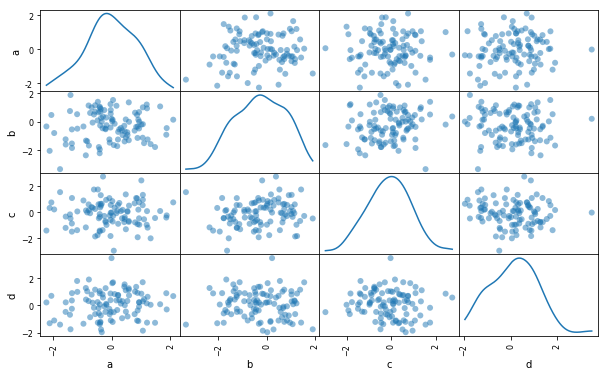

In [13]:
# pandas.plotting.scatter_matrix---散点矩阵
# pd.plotting.scatter_matrix(frame,alpha = 0.5,figsize = None,ax = None,
# grid = False,diagonal = 'hist',marker = '.',density_kwds = None,hist_kwds = None,range_padding = 0.05,**kwds)

df = pd.DataFrame(np.random.randn(100,4),columns = list('abcd'))
pd.plotting.scatter_matrix(df,figsize = (10,6),
                 marker = 'o',
                 diagonal = 'kde',
                 alpha = 0.5,
                 range_padding = 0.1
                 )

# diagonal: ({'hist','kde'}),必须且只能在{'hist','kde'}中选择一个 ---> 每个指标的频率图
# range_padding: (float，可选)，图像在x轴，y轴原点附近的留白（padding），该值越大，留白距离越大，图像远离坐标原点

# 3.11---极坐标图
## 调用subplot()创建子图时，通过设置projection = ‘polar’，便可以创建一个极坐标子图，然后调用plot()在极坐标子图中进行绘图

0    0
1    1
2    2
3    3
4    4
dtype: int32
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]


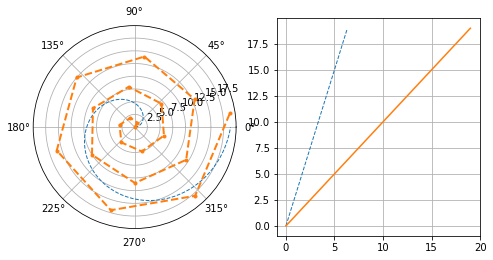

In [14]:
# 创建极坐标轴

s = pd.Series(np.arange(20))
theta = np.arange(0,2*np.pi,0.02)
print(s.head())
print(theta[:10])
#创建数据

fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot(121,projection = 'polar')
ax2 = plt.subplot(122)
# 创建极坐标子图
# 还可以写成：ax = fig.add_subplot(111,polar = 'True')

ax1.plot(theta,theta*3,linestyle = '--',lw = 1)
ax1.plot(s,linestyle = '--',marker = '.',lw = 2)
ax2.plot(theta,theta*3,linestyle = '--',lw = 1)
ax2.plot(s)
plt.grid()
# 创建极坐标图，参数1为角度（弧度制），参数2为value
# lw --- 线宽

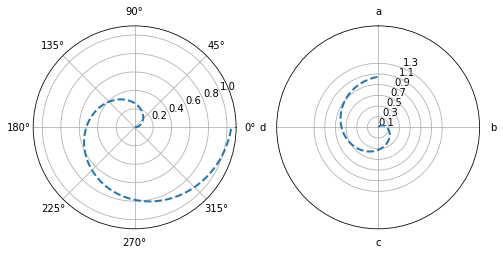

In [15]:
# 极坐标参数设置

theta = np.arange(0,2*np.pi,0.02)
plt.figure(figsize=(8,4))
ax1 = plt.subplot(121,projection = 'polar')
ax2 = plt.subplot(122,projection = 'polar')
ax1.plot(theta,theta/6,'--',lw = 2)
ax2.plot(theta,theta/6,'--',lw = 2)
# 创建极坐标子图ax

ax2.set_theta_direction(-1)
# set_theta_direction(): 坐标轴正方向，默认为逆时针

ax2.set_thetagrids(np.arange(0.0,360.0,90),['a','b','c','d'])
ax2.set_rgrids(np.arange(0.2,2,0.4))
# set_thetagrids(): 设置极坐标角度网格线显示及其标签 ---> 网格和标签数量一致
# set_rgrids(): 设置极径网格线显示，其中参数必须为正数

ax2.set_theta_offset(np.pi/2)
# set_theta_offset(): 设置角度偏移，逆时针，弧度制

ax2.set_rlim(0.2,1.2)
ax2.set_rmax(2)
ax2.set_rticks(np.arange(0.1,1.5,0.2))
# set_rlim(): 设置显示的极径范围
# set_rmax(): 设置显示的极径最大值
# set_rticks(): 设置极径网格线的显示范围

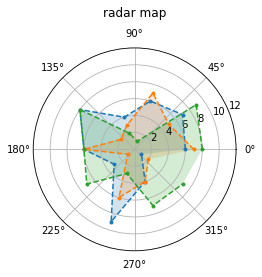

In [16]:
# 雷达图1 --- 极坐标的折线图/填图---plt.plot()

plt.figure(figsize=(8,4))

ax1 = plt.subplot(121,projection = 'polar')
ax1.set_title('radar map\n')                # 创建标题
ax1.set_rlim(0,12)

data1 = np.random.randint(1,10,10)
data2 = np.random.randint(1,10,10)
data3 = np.random.randint(1,10,10)
theta = np.arange(0,2*np.pi,2*np.pi/10)
# 创建数据

ax1.plot(theta,data1,'.--',label = 'data1')
ax1.fill(theta,data1,alpha = 0.2)
ax1.plot(theta,data2,'.--',label = 'data2')
ax1.fill(theta,data2,alpha = 0.2)
ax1.plot(theta,data3,'.--',label = 'data3')
ax1.fill(theta,data3,alpha = 0.2)
# 绘制雷达线

(0, 10)

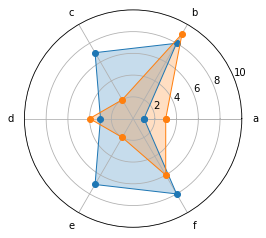

In [17]:
# 雷达图2 --- 极坐标的折线图/填图---plt.polar()
# 首尾闭合

labels = np.array(list('abcdef'))        # 标签
dataLength = 6        # 数据长度
data1 = np.random.randint(0,10,6)
data2 = np.random.randint(0,10,6)       # 数据

angles = np.linspace(0,2*np.pi,dataLength,endpoint = False)
data1 = np.concatenate((data1,[data1[0]]))   # 闭合
data2 = np.concatenate((data2,[data2[0]]))    # 闭合
angles = np.concatenate((angles,[angles[0]]))    # 闭合

plt.polar(angles,data1,'o-',linewidth = 1)         # 绘制极坐标系
plt.fill(angles,data1,alpha = 0.25)      # 填充
plt.polar(angles,data2,'o-',linewidth = 1)         # 绘制极坐标系
plt.fill(angles,data2,alpha = 0.25)      # 填充

plt.thetagrids(angles * 180/np.pi,labels)       # 设置网络，标签
plt.ylim(0,10)                    # polar的极值设置为ylim

(<a list of 8 Line2D thetagridline objects>,
 <a list of 4 Text thetagridlabel objects>)

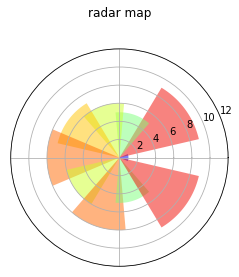

In [18]:
# 极轴图 --- 极坐标的柱状图

plt.figure(figsize=(8,4))

ax1 = plt.subplot(111,projection = 'polar')
ax1.set_title('radar map\n')
ax1.set_rlim(0,12)

data = np.random.randint(1,10,10)
theta = np.arange(0,2*np.pi,2*np.pi/10)
# 创建数据

bar = ax1.bar(theta,data,alpha = 0.5)
for r,bar in zip(data,bar):
    bar.set_facecolor(plt.cm.jet(r/10.))     # 设置颜色
plt.thetagrids(np.arange(0.0,360.0,90),[])   # 设置网格，标签（这里是空标签，则不显示内容）

# 3.12---箱型图
## 箱型图：又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图
## 包含一组数据的：最大值，最小值，中位数，上四分位数（Q1）,下四分位数（Q3）,异常值。
### 1.中位数：一组数据平均分成两份，中间的数
### 2.上四分位数（Q1）：是将序列平均分成四份，计算(n+1)/4与(n-1)/4两种，一般使用(n+1)/4
### 3.下四分位数（Q3）：是将序列平均分成四份，计算(n+1)/4*3=6.75，一般使用(n+1)/4
### 4.内限：T型的盒须就是内限，最大值区间为：Q3+1.5IQR,最小值区间为：Q3-1.5IQR      (IQR = Q3 - Q1)
### 5.外限：T型的盒须就是内限，最大值区间为：Q3+3IQR,最小值区间为：Q3-3IQR      (IQR = Q3 - Q1)
### 6.异常值：内限之外--->中度异常，外限之外--->极度异常
## plt.plot.box(), plt.boxplot()